In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd

In [2]:
data = pd.read_csv(r'data/Demo3/iris.data', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

In [3]:
X, y = data.loc[:, ['sepal length', 'sepal width', 'petal length', 'petal width']], data.iloc[:, 4]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
mlp = MLPClassifier(solver='adam', activation='relu',alpha=1e-4, hidden_layer_sizes=(3,3), random_state=1, max_iter=100000)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=100000, random_state=1)

In [6]:
print(mlp.score(X_test, y_test))
print(y_test)
print(mlp.predict(X_test))

0.9473684210526315
21         Iris-setosa
105     Iris-virginica
97     Iris-versicolor
22         Iris-setosa
33         Iris-setosa
103     Iris-virginica
20         Iris-setosa
6          Iris-setosa
114     Iris-virginica
129     Iris-virginica
100     Iris-virginica
1          Iris-setosa
37         Iris-setosa
137     Iris-virginica
138     Iris-virginica
46         Iris-setosa
133     Iris-virginica
55     Iris-versicolor
47         Iris-setosa
107     Iris-virginica
68     Iris-versicolor
59     Iris-versicolor
149     Iris-virginica
45         Iris-setosa
130     Iris-virginica
115     Iris-virginica
134     Iris-virginica
125     Iris-virginica
12         Iris-setosa
61     Iris-versicolor
56     Iris-versicolor
14         Iris-setosa
119     Iris-virginica
50     Iris-versicolor
78     Iris-versicolor
51     Iris-versicolor
71     Iris-versicolor
35         Iris-setosa
Name: class, dtype: object
['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' '

In [7]:
mlp = MLPClassifier(solver='sgd', activation='relu', alpha=1e-4, hidden_layer_sizes=(3,3), random_state=1, max_iter=100000)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=100000, random_state=1,
              solver='sgd')

In [8]:
print(mlp.score(X_test, y_test))
print(y_test)
print(mlp.predict(X_test))

0.9736842105263158
21         Iris-setosa
105     Iris-virginica
97     Iris-versicolor
22         Iris-setosa
33         Iris-setosa
103     Iris-virginica
20         Iris-setosa
6          Iris-setosa
114     Iris-virginica
129     Iris-virginica
100     Iris-virginica
1          Iris-setosa
37         Iris-setosa
137     Iris-virginica
138     Iris-virginica
46         Iris-setosa
133     Iris-virginica
55     Iris-versicolor
47         Iris-setosa
107     Iris-virginica
68     Iris-versicolor
59     Iris-versicolor
149     Iris-virginica
45         Iris-setosa
130     Iris-virginica
115     Iris-virginica
134     Iris-virginica
125     Iris-virginica
12         Iris-setosa
61     Iris-versicolor
56     Iris-versicolor
14         Iris-setosa
119     Iris-virginica
50     Iris-versicolor
78     Iris-versicolor
51     Iris-versicolor
71     Iris-versicolor
35         Iris-setosa
Name: class, dtype: object
['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' '

### 手写ANN

In [9]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
plt.style.use('mpl20')

# 将标签转换为one-hot编码
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

进行中：: 100%|██████████| 1000/1000 [00:15<00:00, 65.88it/s]


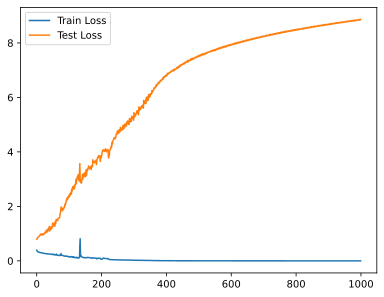

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm


# 定义神经网络模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 32)
        self.fc2 = nn.Linear(32, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)

# 训练网络
num_epochs = 1000
train_loss_list = []
test_loss_list = []
for epoch in tqdm(iterable=range(num_epochs), desc='进行中：'):
    # 训练集
    running_loss = 0.0
    for i, data in enumerate(zip(X_train, y_test)):
        inputs, labels = data
        inputs = torch.tensor(inputs, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.float32)
        optimizer.zero_grad()
        outputs = net(inputs)
        # print(outputs.shape, labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss_list.append(running_loss / len(X_train))
    
    # 测试集
    running_loss = 0.0
    for i, data in enumerate(zip(X_test, y_test)):
        inputs, labels = data
        inputs = torch.tensor(inputs, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.float32)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
    test_loss_list.append(running_loss / len(X_test))

# 绘制损失函数曲线
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.legend()
plt.show()

### SVM

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        19

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 19]]


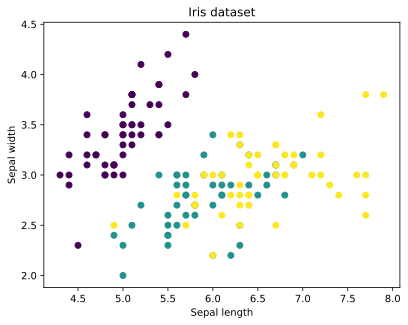

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv(r'data/Demo3/iris.data', header=None)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data, labels = df.loc[:, ['sepal length', 'sepal width', 'petal length', 'petal width']], df.iloc[:, 4]

labels = labels.map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}).astype(int)


train_data, test_data, train_labels, test_labels = train_test_split(data, labels)

model = SVC(kernel='linear', C=1, decision_function_shape='ovr')
model.fit(train_data, train_labels)

# 预测测试集
predicted_labels = model.predict(test_data)

# 输出分类指标和混淆矩阵
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels, predicted_labels))
print(confusion_matrix(test_labels, predicted_labels))

# 绘制分类图像
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 计算分类指标
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

# 输出分类指标
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
